<a href="https://colab.research.google.com/github/rosywaruku/ML-Tasks/blob/main/Groupwork/Class_Task_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem definition
You are provided with the Housing Pricing dataset. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

###Load the dataset

In [2]:
data = pd.read_csv('house_pricing.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


###Explore the dataset

In [3]:
# check no. of rows and columns in the dataset
data.shape

(1460, 77)

In [4]:
# list all the columns in the dataset
print(data.columns)
print("\n No. of columns:", data.columns.size)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

### Identify Features

In [5]:
features = data.drop(columns="SalePrice")

#list all the features
print(features.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

###Identify target variable

In [6]:
target=['SalePrice']
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


###Check for missing values

In [7]:
#missing values in features
features.isnull().values.any()

True

In [8]:
#missing values in target
data[target].isnull().values.any()

False

In [9]:
# get numerical columns from features
numerical_features = [col for col in features.columns
                  if features[col].dtype == 'int64' or features[col].dtype == 'float64']
print("List of Numerical Features \n", numerical_features)
print("No. of Numerical Features:", len(numerical_features))

# get object columns from X
categorical_features = [col for col in features.columns
                    if features[col].dtype == 'object']
print("\nList of Categorical Features \n", categorical_features)
print("No. of Categorical Features:", len(categorical_features)) 

List of Numerical Features 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
No. of Numerical Features: 37

List of Categorical Features 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQu

###Fill in missing values:
Fill in the missing values with the median in that column for numerical features. 
Fill in missing values for categorical features with idxmax which returns the most common value across a feature.



In [10]:
#Filling in missing values for numeric features
features = features.fillna(features.median(numeric_only=True))

In [11]:
features.isnull().values.any()

True

In [12]:
#fill in missing values for categorical features
for feature in categorical_features:
  features.fillna(data[feature].value_counts().idxmax(),inplace=True)
features[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,RL,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,RL,Attchd,Unf,TA,TA,Y,WD,Normal


In [13]:
features.isnull().values.any()

False

###Check for duplicate records

In [14]:
features.duplicated().any()

False

###Handle outliers for a more accurate result

###Encode the dataset
Convert the categorical features to numerical features

In [15]:
# Count the column types
features.dtypes.value_counts()

object     39
int64      34
float64     3
dtype: int64

In [16]:
# categorize predictive features as either numerical, nominal or ordinal
numerical_cols = [col for col in features.columns
                  if features[col].dtype == 'int64' or features[col].dtype == 'float64']

numerical = numerical_cols 

nom_ord= features.drop(columns=numerical)

#list the names of columns of nominal and ordinal features to assist in sorting
nom_ord.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
nominal=['Street','MSZoning','LotConfig','Neighborhood','Condition1', 'Condition2',
         'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
         'MasVnrType','Foundation','Heating','CentralAir','GarageType','SaleType',
         'SaleCondition'] #19 columns

ordinal=['LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
         'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
         'Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
         'GarageCond','PavedDrive'] #20 columns

In [18]:
#encoding ordinal features
for feature in ordinal:
  value = features[feature]
  encoder = LabelEncoder()
  trans_f = encoder.fit_transform(value)
  features[feature]=trans_f

features

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,3,3,0,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,3,3,0,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,0,3,0,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,0,3,0,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,0,3,0,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,3,3,0,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,3,3,0,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,3,3,0,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,3,3,0,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [19]:
 features.isnull().values.any()

False

One-hot encoding for the nominal categorical values




In [20]:
encoded_columns = pd.get_dummies(features[nominal])
prepared_data = features.join(encoded_columns).drop(nominal, axis=1)
prepared_data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,3,3,0,0,7,5,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,3,3,0,0,6,8,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,0,3,0,0,7,5,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,0,3,0,0,7,5,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,0,3,0,0,8,5,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,3,3,0,0,6,5,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,3,3,0,0,6,6,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,3,3,0,0,7,9,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,3,3,0,0,5,6,...,0,0,0,1,0,0,0,0,1,0


###Standardize the set

In [21]:
X=prepared_data.to_numpy()

X= StandardScaler().fit_transform(X)
X

array([[-1.73086488,  0.07337496, -0.22087509, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 , -0.87256276,  0.46031974, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953,  0.07337496, -0.08463612, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 1.72611953,  0.30985939, -0.1754621 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7284922 , -0.87256276, -0.08463612, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73086488, -0.87256276,  0.23325479, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [22]:
target=['SalePrice']
y=data[target]
y.to_numpy()

y=StandardScaler().fit_transform(y)
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

###Feature extraction using PCA

In [23]:
#2 principal components
pca=PCA(n_components=2)
p_components=pca.fit_transform(X)
p_components

array([[ 3.3174404 , -1.15553964],
       [-0.4659899 ,  3.02822963],
       [ 3.61458145, -0.83466296],
       ...,
       [ 0.50756626, -2.38670141],
       [-3.05302448,  3.51381954],
       [-1.09430796,  3.77047868]])

In [24]:
pca.explained_variance_ratio_

array([0.07049273, 0.03321938])

###Visualize the new Dataset

In [25]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,3.317440,-1.155540,0.347273
1,-0.465990,3.028230,0.007288
2,3.614581,-0.834663,0.536154
3,-2.004384,-1.542482,-0.515281
4,5.524724,-0.664521,0.869843
...,...,...,...
1455,1.896662,-2.147336,-0.074560
1456,1.057545,4.451526,0.366161
1457,0.507566,-2.386701,1.077611
1458,-3.053024,3.513820,-0.488523


###Feature selection using L1
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

###Cost function
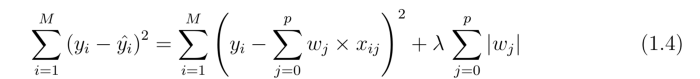

In [34]:
regressor = LassoCV()
regressor.fit(X,y)
reg_score=regressor.score(X,y.ravel())
coeff_used = np.sum(regressor.coef_!=0)
print("score:", reg_score) 
print("number of features used: ", coeff_used)
print("L1 selected only ",coeff_used)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score: 0.8996870509436886
number of features used:  59
L1 selected only  59


###Train the model

In [27]:
regressor.coef_

array([-0.        , -0.02946089,  0.0072703 ,  0.04944955, -0.        ,
        0.        , -0.        ,  0.        ,  0.17381027,  0.05097817,
        0.05924261,  0.0186089 ,  0.0415007 , -0.07893375,  0.        ,
       -0.0638704 ,  0.00123424, -0.02797   , -0.        ,  0.11790252,
       -0.        ,  0.00271593, -0.        ,  0.06712713, -0.00847827,
        0.        ,  0.00746359,  0.        , -0.00445328,  0.33320356,
        0.0037331 , -0.        ,  0.        ,  0.        , -0.        ,
       -0.0083952 , -0.07436089,  0.        ,  0.03366966,  0.02930382,
       -0.00192469,  0.        , -0.        ,  0.02856766,  0.04588662,
        0.        ,  0.        ,  0.        ,  0.01299498,  0.        ,
       -0.        ,  0.        ,  0.00966065,  0.01189041, -0.        ,
       -0.00063359, -0.        , -0.00218273,  0.        , -0.01358835,
        0.        , -0.        ,  0.        , -0.00084486, -0.        ,
        0.01805218, -0.        , -0.        , -0.        , -0.  

In [28]:
regressor.intercept_

-3.275309475364663e-17

###Plot the data

In [30]:
final_data_array=final_data.to_numpy()

In [31]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X_plot,Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [32]:
#getting the weights and intercepts
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

w_1, w_2, b

(-0.0, -0.029460888226347064, -3.275309475364663e-17)

Text(0.5, 0.92, 'Plane of Best Fit')

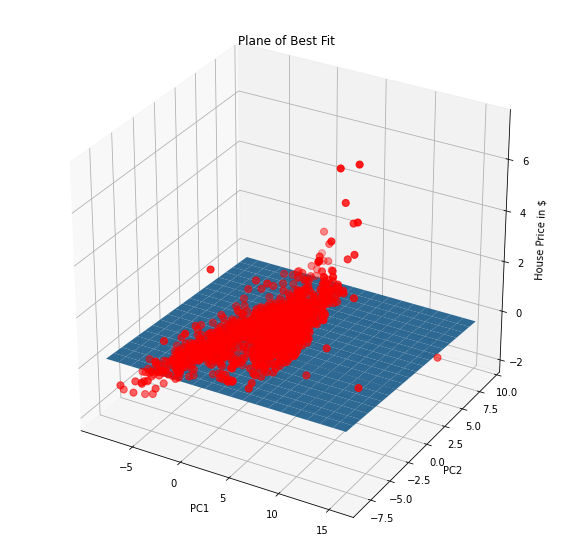

In [33]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")